In [1]:
# api-key:ynw2u8e4h9sk8c2htp7vutxq

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
import requests
from pattern import web

#### Note: help document for each resource type

In [97]:
# for resource: talks
help_url = 'https://api.ted.com/v1/talks/help.html?api-key=ynw2u8e4h9sk8c2htp7vutxq'

## 1 Get all talks

In [1]:
url_base = 'https://api.ted.com/v1/talks.json?api-key=ynw2u8e4h9sk8c2htp7vutxq'
params = dict(limit=100,offset=0)

In [39]:
print url_base

https://api.ted.com/v1/talks.json?api-key=ynw2u8e4h9sk8c2htp7vutxq


In [40]:
response = requests.get(url_base,params = params)
response.url

u'https://api.ted.com/v1/talks.json?api-key=ynw2u8e4h9sk8c2htp7vutxq&limit=50&offset=0'

##### There are two elements: # of talks, counts, and talks

In [41]:
response.json().keys()

[u'talks', u'counts']

##### How many of talks are external source (youtube, vimeo), these might not have captions 

In [4]:
response2 = requests.get(url_base,params = dict(limit = 100, offset = 0, externals = False))

In [6]:
response2.json()['counts']

{u'this': 100, u'total': 1905}

##### Look at each talk

In [44]:
counts = response.json()['counts']
print 'There are {} talks in total, this query returns {} talks'.format(counts['total'],counts['this'])

There are 1976 talks in total, this query returns 50 talks


In [47]:
talks = response.json()['talks']
# first talk
talk1 = talks[0]['talk']
talk1.keys()

[u'description',
 u'event_id',
 u'published_at',
 u'slug',
 u'updated_at',
 u'released_at',
 u'native_language_code',
 u'recorded_at',
 u'id',
 u'name']

In [61]:
col_record_features = talk1.keys()

In [55]:
talk1['description']

u'With the same humor and humanity he exuded in <em>An Inconvenient Truth,</em> Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter "brand name" for global warming.'

In [74]:
talk1['name']

u'Al Gore: Averting the climate crisis'

### 1.1 Get all talks (as a collection) into a list: talk_collection

In [86]:
# a loop to get all records as a collection
talk_collection = []
for i in xrange(20):
    offset = i*100
    response = requests.get(url_base,params = dict(limit = 100, offset = offset))
    talk_collection.append(response.json())

In [88]:
# we have had all the talks, since the last shows 76 talks
talk_collection[-1]['counts']

{u'this': 76, u'total': 1976}

In [93]:
# gather the basic info for each talk into a df
talks_basic = [x['talk'] for y in talk_collection for x in y['talks']]
print 'there are {} talks in total'.format(len(talks_basic))

there are 1976 talks in total


In [94]:
talks_basic[0]

{u'description': u'With the same humor and humanity he exuded in <em>An Inconvenient Truth,</em> Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter "brand name" for global warming.',
 u'event_id': 3,
 u'id': 1,
 u'name': u'Al Gore: Averting the climate crisis',
 u'native_language_code': u'en',
 u'published_at': u'2006-06-27 00:11:00',
 u'recorded_at': u'2006-02-25 00:00:00',
 u'released_at': u'2013-12-02 21:24:10',
 u'slug': u'al_gore_on_averting_climate_crisis',
 u'updated_at': u'2014-11-05 16:39:29'}

In [140]:
# convert to a df
talks_basic_df = pd.DataFrame(talks_basic)
talks_basic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 10 columns):
description             1976 non-null object
event_id                1976 non-null int64
id                      1976 non-null int64
name                    1976 non-null object
native_language_code    1976 non-null object
published_at            1976 non-null object
recorded_at             1976 non-null object
released_at             1976 non-null object
slug                    1976 non-null object
updated_at              1976 non-null object
dtypes: int64(2), object(8)
memory usage: 169.8+ KB


#####Before moving on to detailed records, we need to keep the ids of talks that have captions (originally from TED) 

In [7]:
cap_talk_collection = []
for i in xrange(20):
    offset = i*100
    response = requests.get(url_base,params = dict(limit = 100, offset = offset,externals = False))
    cap_talk_collection.append(response.json())

In [8]:
# gather the basic info for each talk into a df
cap_talks_basic = [x['talk'] for y in cap_talk_collection for x in y['talks']]
print 'there are totally {} original TED talks'.format(len(cap_talks_basic))

there are totally 1905 original TED talks


In [11]:
cap_talks_basic[100]['id']

109

In [13]:
# record all ids for original TED talks
tedtalkids = [x['id'] for x in cap_talks_basic]
tedtalkids = pd.Series(tedtalkids)

In [17]:
tedtalkids.to_csv('tedtalkid.csv',index = False, header = None)

##### The above record has limited features, because it was accessed among a collection of talks, how about individual talk records

In [76]:
indurl = 'https://api.ted.com/v1/talks/1.json?api-key=ynw2u8e4h9sk8c2htp7vutxq'
indres = requests.get(indurl)

In [79]:
talk1_ind = indres.json()['talk']

In [80]:
talk1_ind.keys()

[u'viewed_count',
 u'image_16x9',
 u'speakers',
 u'description',
 u'themes',
 u'tags',
 u'event',
 u'updated_at',
 u'emailed_count',
 u'slug',
 u'languages',
 u'media',
 u'published_at',
 u'recorded_at',
 u'images',
 u'commented_count',
 u'ratings',
 u'id',
 u'name']

In [81]:
ind_record_features = talk1_ind.keys()

In [141]:
# the extra information in each individual query is:
set(col_record_features).difference(set(ind_record_features))

{u'event_id', u'native_language_code', u'released_at'}

In [142]:
# the common features are:
set(col_record_features).intersection(set(ind_record_features))

{u'description',
 u'id',
 u'name',
 u'published_at',
 u'recorded_at',
 u'slug',
 u'updated_at'}

### 1.2 Get detailed info

In [99]:
# get the ids from the basic dataframe, note the ids are not consecutive
ids = talks_basic_df.id

In [100]:
len(ids)

1976

In [131]:
# loop to get the details
import time
talk_details = []
start_time = time.time()
for idx in ids:
    time.sleep(0.18)
    indurl = 'https://api.ted.com/v1/talks/'+str(idx)+'.json?api-key=ynw2u8e4h9sk8c2htp7vutxq'
    indresponse = requests.get(indurl)
    talk_details.append(indresponse.json()['talk'])

print("--- %s seconds ---" % (time.time() - start_time))

--- 1252.53067589 seconds ---


In [132]:
len(talk_details)

1976

In [135]:
talks_detail_df = pd.DataFrame(talk_details)

### 1.3 Merge the two and save original talks df

In [138]:
# combine the two 
talks = pd.merge(talks_basic_df,talks_detail_df)

##### talks were downloaded on Saturday, May 9th, 2015

In [139]:
talks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 22 columns):
description             1976 non-null object
event_id                1976 non-null int64
id                      1976 non-null int64
name                    1976 non-null object
native_language_code    1976 non-null object
published_at            1976 non-null object
recorded_at             1976 non-null object
released_at             1976 non-null object
slug                    1976 non-null object
updated_at              1976 non-null object
commented_count         1976 non-null int64
emailed_count           1976 non-null int64
event                   1976 non-null object
image_16x9              1976 non-null object
images                  1976 non-null object
languages               1885 non-null object
media                   1976 non-null object
ratings                 1976 non-null object
speakers                1976 non-null object
tags                    1976 non-null obje

In [161]:
# save the original merged df
talks.to_csv('talks.csv',encoding = 'utf-8',index = False)

In [215]:
# save the original merged df: talks to json
talks.to_json('talks.json')

In [98]:
# read in the df from json 
# as talks_r
talks_r = pd.read_json('talks.json')
talks_r.reset_index(drop = True, inplace = True)

In [99]:
talks_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 22 columns):
commented_count         1976 non-null int64
description             1976 non-null object
emailed_count           1976 non-null int64
event                   1976 non-null object
event_id                1976 non-null int64
id                      1976 non-null int64
image_16x9              1976 non-null object
images                  1976 non-null object
languages               1885 non-null object
media                   1976 non-null object
name                    1976 non-null object
native_language_code    1976 non-null object
published_at            1976 non-null datetime64[ns]
ratings                 1976 non-null object
recorded_at             1976 non-null datetime64[ns]
released_at             1976 non-null datetime64[ns]
slug                    1976 non-null object
speakers                1976 non-null object
tags                    1976 non-null object
themes            

### 1.4 Clean up the columns

In [100]:
talks_f = talks_r.copy(deep = True)

#### 1.4.1 add event_name, drop event

In [101]:
talks_f['event_name'] = talks_f['event'].apply(lambda x: x['name'])
talks_f.drop('event',inplace = True,axis = 1)

#### 1.4.2 process languages into a list

In [102]:
# def function to process languages
def lan_fun(lan_dict):
    lans = []
    if lan_dict == None:
        return
    for lan in lan_dict.keys():
            lans.append(lan_dict[lan]['name'])
    return lans

In [103]:
talks_f['languages']=talks_f['languages'].apply(lan_fun)

In [104]:
talks_f[['languages']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 1 columns):
languages    1885 non-null object
dtypes: object(1)
memory usage: 30.9+ KB


#### 1.4.3 ratings

In [105]:
talks_f['ratings'][0]

[{u'rating': {u'count': 460, u'id': 7, u'name': u'Funny'}},
 {u'rating': {u'count': 126, u'id': 3, u'name': u'Courageous'}},
 {u'rating': {u'count': 51, u'id': 2, u'name': u'Confusing'}},
 {u'rating': {u'count': 50, u'id': 1, u'name': u'Beautiful'}},
 {u'rating': {u'count': 214, u'id': 21, u'name': u'Unconvincing'}},
 {u'rating': {u'count': 95, u'id': 11, u'name': u'Longwinded'}},
 {u'rating': {u'count': 383, u'id': 8, u'name': u'Informative'}},
 {u'rating': {u'count': 356, u'id': 10, u'name': u'Inspiring'}},
 {u'rating': {u'count': 100, u'id': 22, u'name': u'Fascinating'}},
 {u'rating': {u'count': 50, u'id': 9, u'name': u'Ingenious'}},
 {u'rating': {u'count': 235, u'id': 24, u'name': u'Persuasive'}},
 {u'rating': {u'count': 85, u'id': 23, u'name': u'Jaw-dropping'}},
 {u'rating': {u'count': 116, u'id': 26, u'name': u'Obnoxious'}},
 {u'rating': {u'count': 164, u'id': 25, u'name': u'OK'}}]

##### Note not all talks have all ratings: Funny, Obnoxious, Unconvincing,... 14 words in total

In [106]:
sum(talks_f['ratings'].apply(lambda x: len(x)==14))

1687

In [107]:
from collections import defaultdict

In [108]:
# split ratings into individual columns, retain a rating_count column counting for all ratings
def rating_fun(rating_list):
    ratingdict = defaultdict(int)
    for rating in rating_list:
        key,value = rating['rating']['name'],rating['rating']['count']
        ratingdict[key]=value
    return ratingdict

In [109]:
ratingdict_list = [rating_fun(x) for x in talks_f['ratings']]

In [110]:
ratingdf = pd.DataFrame(ratingdict_list)

In [22]:
ratingwords = ['Funny','Courageous','Beautiful','Informative','Inspiring','Fascinating','Ingenious','Persuasive','Jaw-dropping',
               'OK','Obnoxious','Confusing','Unconvincing','Longwinded']

In [112]:
talks_f[ratingwords]=ratingdf[ratingwords]

In [113]:
talks_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 36 columns):
commented_count         1976 non-null int64
description             1976 non-null object
emailed_count           1976 non-null int64
event_id                1976 non-null int64
id                      1976 non-null int64
image_16x9              1976 non-null object
images                  1976 non-null object
languages               1885 non-null object
media                   1976 non-null object
name                    1976 non-null object
native_language_code    1976 non-null object
published_at            1976 non-null datetime64[ns]
ratings                 1976 non-null object
recorded_at             1976 non-null datetime64[ns]
released_at             1976 non-null datetime64[ns]
slug                    1976 non-null object
speakers                1976 non-null object
tags                    1976 non-null object
themes                  1976 non-null object
updated_at        

##### Now, change the original rating column into a rating_count column

In [114]:
def rating_count_fun(rating_list):
    counts = 0
    for rating in rating_list:
        counts += rating['rating']['count']
    return counts

In [115]:
talks_f['rating_count']=talks_f['ratings'].apply(rating_count_fun)
talks_f.drop('ratings',axis = 1, inplace = True)

In [116]:
talks_f.shape

(1976, 36)

#### 1.4.4 speakers

In [117]:
talks_f.speakers[0]

[{u'speaker': {u'id': 2, u'name': u'Al Gore'}}]

##### take a look at the speakers resource

In [118]:
sp_url = 'https://api.ted.com/v1/speakers.json?api-key=ynw2u8e4h9sk8c2htp7vutxq'

In [119]:
sp_num = requests.get(sp_url).json()['counts']

In [120]:
print 'There are {} speakers in total'.format(sp_num['total'])

There are 1688 speakers in total


In [121]:
spurl = 'https://api.ted.com/v1/speakers/2.json?api-key=ynw2u8e4h9sk8c2htp7vutxq'

In [122]:
sp1 = requests.get(spurl)

In [123]:
sp1.url

u'https://api.ted.com/v1/speakers/2.json?api-key=ynw2u8e4h9sk8c2htp7vutxq'

In [124]:
sp1.json()['speaker'].keys()

[u'description',
 u'firstname',
 u'title',
 u'updated_at',
 u'lastname',
 u'middleinitial',
 u'published_at',
 u'whylisten',
 u'slug',
 u'whotheyare',
 u'id']

##### First step, replace the speakers column with speaker_ids

Determine if all talks are given by only one speaker

In [125]:
sum(talks_f['speakers'].apply(lambda x: len(x)==1))

1940

In [126]:
# apparently not, take 3rd as an example
talks_f.ix[3,'name']

u'Eddi Reader: "What You\'ve Got"'

In [127]:
def speaker_id_fun(speaker_list):
    ids = []
    for speaker in speaker_list:
        ids.append(speaker['speaker']['id'])
    return ids

In [128]:
talks_f['speaker_ids']= talks_f['speakers'].apply(speaker_id_fun)

In [129]:
talks_f.drop('speakers',axis = 1, inplace=True)

In [130]:
talks_f.shape

(1976, 36)

#### 1.4.5 Develop a keywords column from tags and themes

Note a query from the I/O Docs shows there are only 47 themes, potentially useful feature, 
A rather useful query also on there is talk_lists that fall into each theme, therefore a popularity vs theme plot can be made

In [131]:
def keywords_fun(row):
    # note this function should be applied to the whole df
    keywords = []
    for theme in row['themes']:
        keywords.append(theme['theme']['name'])
    for tag in row['tags']:
        keywords.append(tag['tag'])
    return keywords

In [132]:
keywords = []
for i in xrange(talks_f.shape[0]):
    keywords.append(keywords_fun(talks_f.ix[i,:]))

In [133]:
talks_f['keywords']=keywords

##### Now save this cleaned-up df

In [136]:
talks_f.to_json('talks_f.json')

In [4]:
talks_f = pd.read_json('talks_f.json')

In [5]:
talks_small = talks_f.drop(['slug','event_name','image_16x9','images','media','tags'],axis = 1)

In [6]:
talks_small.reset_index(inplace = True)

In [7]:
talks_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 32 columns):
index                   1976 non-null float64
Beautiful               1968 non-null float64
Confusing               1889 non-null float64
Courageous              1966 non-null float64
Fascinating             1975 non-null float64
Funny                   1879 non-null float64
Informative             1961 non-null float64
Ingenious               1969 non-null float64
Inspiring               1976 non-null int64
Jaw-dropping            1971 non-null float64
Longwinded              1942 non-null float64
OK                      1976 non-null int64
Obnoxious               1900 non-null float64
Persuasive              1968 non-null float64
Unconvincing            1954 non-null float64
commented_count         1976 non-null int64
description             1976 non-null object
emailed_count           1976 non-null int64
event_id                1976 non-null int64
id                      1976 n

In [8]:
talks_small['keywords'][0]

[u'Presentation Innovation',
 u'A Greener Future?',
 u'Bold Predictions, Stern Warnings',
 u'Design That Matters',
 u'Not Business as Usual',
 u'Technology, History and Destiny',
 u'TED Conference',
 u'alternative energy',
 u'cars',
 u'climate change',
 u'culture',
 u'environment',
 u'global issues',
 u'politics',
 u'science',
 u'sustainability',
 u'technology']

## 2. Exploratory analysis

### 2.1 Response (counts) distribution and their correlation

In [9]:
maxvc = talks_small.viewed_count.max()
minvc = talks_small.viewed_count.min()

#### 2.1.1 hist of view counts

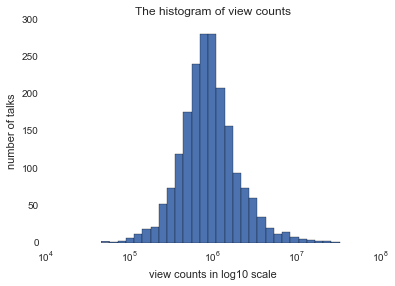

In [10]:
fig = plt.figure()
ax1 = plt.gca()
ax1.set_xscale('log')
talks_small['viewed_count'].hist(bins = np.logspace(np.log10(minvc),np.log10(maxvc),30),ax = ax1)
plt.title('The histogram of view counts',)
plt.xlabel('view counts in log10 scale')
plt.ylabel('number of talks')

#### 2.1.2 hist of comments counts

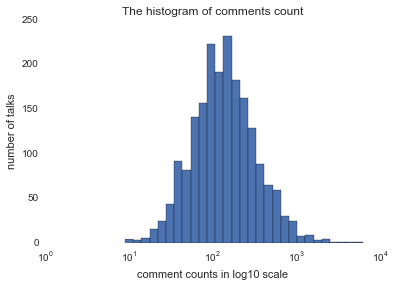

In [11]:
fig2 = plt.figure()
ax2 = plt.gca()
ax2.set_xscale('log')
mincc = talks_small.commented_count.min();maxcc = talks_small.commented_count.max()
talks_small['commented_count'].hist(bins = np.logspace(np.log10(mincc),np.log10(maxcc),30),ax = ax2)
plt.title('The histogram of comments count')
plt.xlabel('comment counts in log10 scale')
plt.ylabel('number of talks')

#### 2.1.3 hist of emailed counts

In [12]:
# add 0.1 to avoid 0 count
email_count = talks_small.emailed_count + 0.1

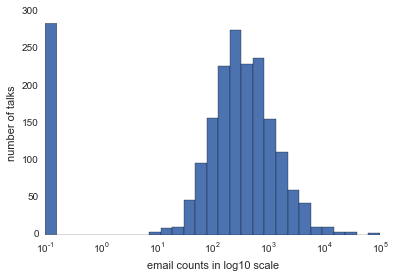

In [13]:
fig3 = plt.figure()
ax3 = plt.gca()
ax3.set_xscale('log')
minec = email_count.min();maxec = email_count.max()
email_count.hist(bins =np.logspace(np.log10(minec),np.log10(maxec),30),ax = ax3)
plt.xlabel('email counts in log10 scale')
plt.ylabel('number of talks')

#### 2.1.4 hist of rating counts

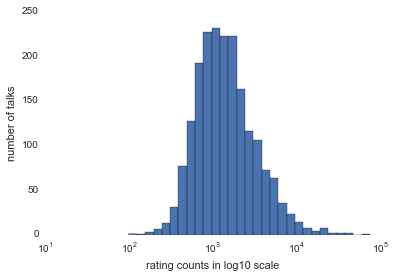

In [14]:
fig4 = plt.figure()
ax4 = plt.gca()
ax4.set_xscale('log')
minrc = talks_small.rating_count.min();maxrc = talks_small.rating_count.max()
talks_small.rating_count.hist(ax = ax4,bins = np.logspace(np.log10(minrc),np.log10(maxrc),30))
plt.xlabel('rating counts in log10 scale')
plt.ylabel('number of talks')

#### 2.1.5 Correlations

In [15]:
counts = pd.DataFrame(dict(emailcounts = np.log10(email_count),ratingcounts = np.log10(talks_small.rating_count),
                           viewcounts = np.log10(talks_small.viewed_count),commentcounts = np.log10(talks_small.commented_count) ))

In [16]:
counts.head()

,commentcounts,emailcounts,ratingcounts,viewcounts
0,2.387390,2.857393,3.395326,6.453634
1,1.892095,2.663795,3.179264,5.980636
2,2.190332,1.764176,3.107549,5.932767
3,2.139879,2.477266,3.231470,5.296803
4,1.633468,-1.000000,2.857935,5.738888


In [17]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e3e20d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113135f50>]], dtype=object)

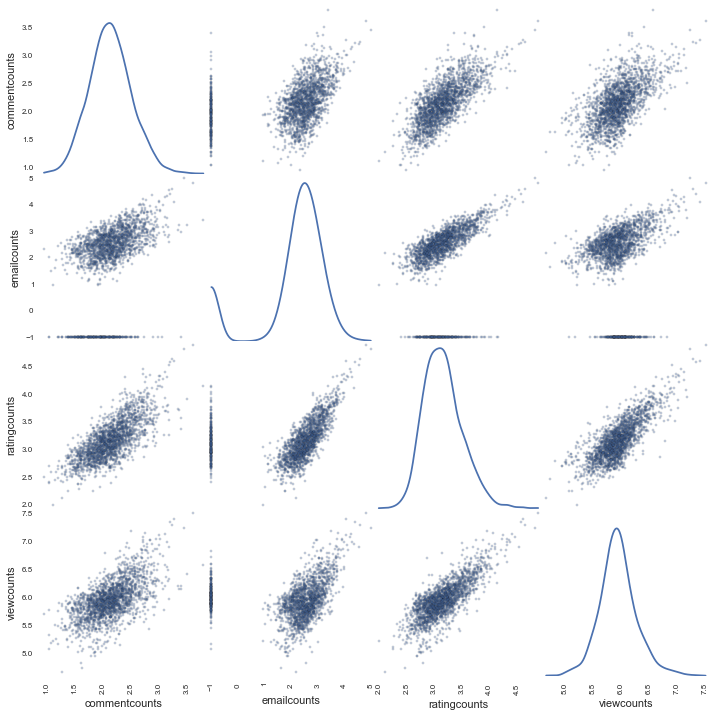

In [19]:
scatter_matrix(counts,alpha = 0.3, diagonal = 'kde',figsize = (12,12))

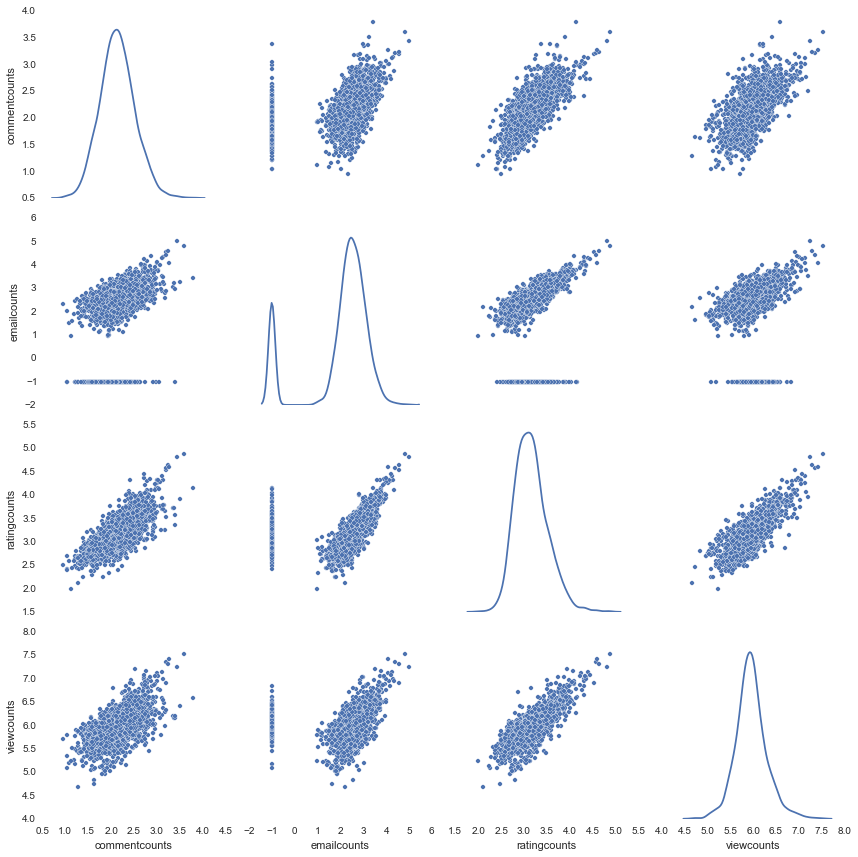

In [20]:
sns.pairplot(counts,diag_kind='kde')

summary: all counts are heavily right skewed, variations exist, they are likely to be the response variables, also, they are highly correlated, so can think of some weighted average as a combined popularity score
next look into the features

### 2.2 Look at rating words dist

In [23]:
# fill nas with 0
talks_small[ratingwords] = talks_small[ratingwords].fillna(0)

In [24]:
# define a plot hist function
def counthist(feature_name,ax):
    feature = talks_small[feature_name] + 0.1
    start = np.log10(feature.min());stop = np.log10(feature.max())
    ax.set_xscale('log')
    feature.hist(bins = np.logspace(start,stop,30),ax = ax,label = feature_name)
    ax.legend(loc = 'best',fontsize = 'medium')

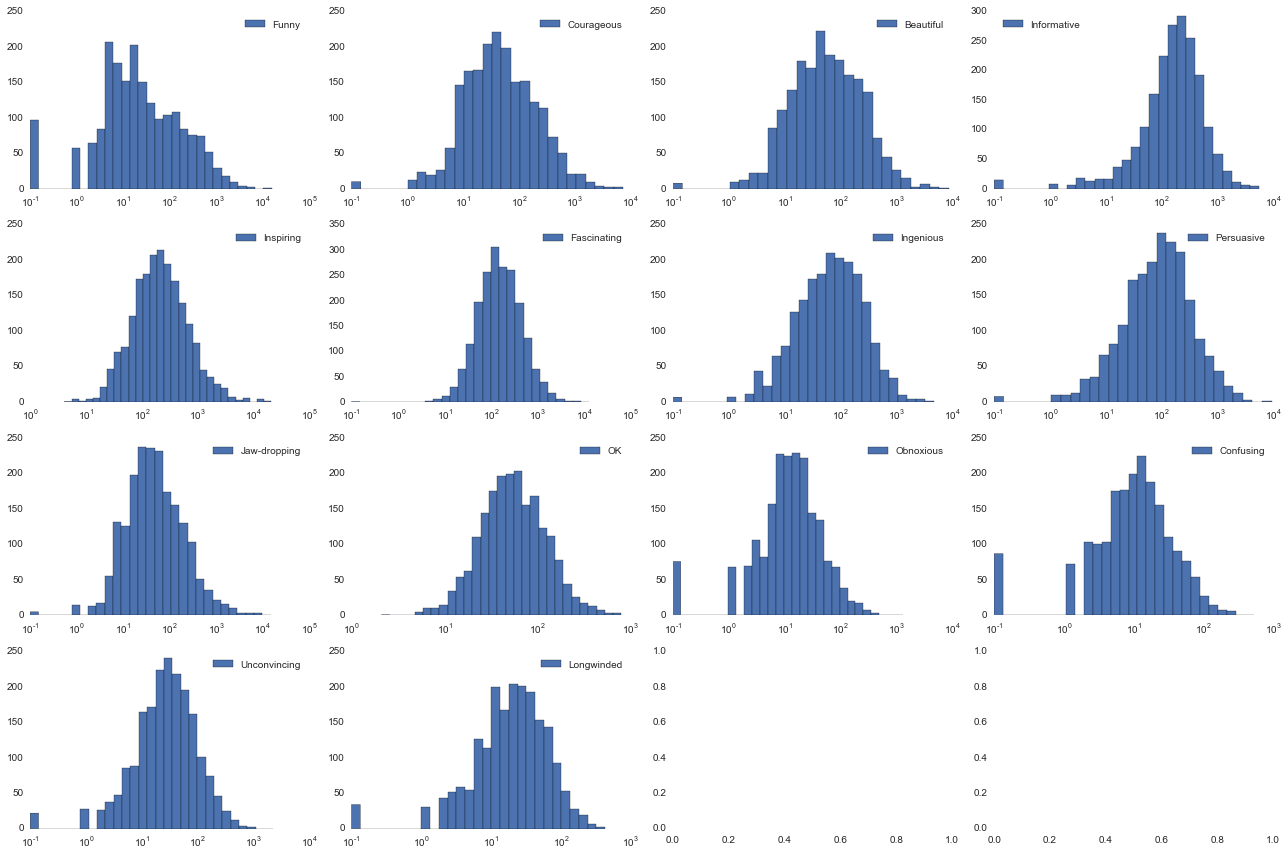

In [25]:
fig, axes=plt.subplots(figsize = (18,12),nrows=4, ncols=4)
for ind in xrange(14):
    i = ind/4;j = ind%4
    ax = axes[i][j]
    counthist(ratingwords[ind],ax)
fig.tight_layout()

In [26]:
# since rating words counts are also right-skewed, take the median
talks_small[ratingwords].median().order(ascending = False)

Inspiring       208.0
Informative     180.0
Fascinating     147.5
Persuasive       93.0
Ingenious        68.5
OK               54.0
Beautiful        54.0
Jaw-dropping     43.0
Courageous       43.0
Unconvincing     28.0
Longwinded       21.0
Funny            19.0
Obnoxious        13.0
Confusing        11.0
dtype: float64

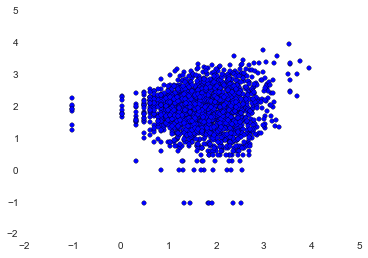

In [32]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(np.log10(talks_small.Beautiful + 0.1),np.log10(talks_small.Persuasive + 0.1))

### 2.3 features

Get the themes (47) and test a few to see if either counts or ratings have different conditional dist dependent on the themes

In [27]:
th_url = 'https://api.ted.com/v1/themes.json?api-key=ynw2u8e4h9sk8c2htp7vutxq&limit=100'
th_res = requests.get(th_url)

In [28]:
themes = [(x['theme']['name'],x['theme']['id']) for x in th_res.json()['themes']]

In [29]:
themes = dict(themes)

In [30]:
themes.keys()

[u'Live Music',
 u'Celebrating TEDWomen',
 u'Whipsmart Comedy',
 u'Listening to Teachers',
 u'Spectacular Performance',
 u'Ocean Wonders',
 u'Bold Predictions, Stern Warnings',
 u'What Makes Us Happy?',
 u'Media With Meaning',
 u'Technology, History and Destiny',
 u'How the Mind Works',
 u'Talks from TED Fellows',
 u'Medicine Without Borders',
 u'Hidden Gems',
 u'War and Peace',
 u'The Rise of Collaboration',
 u'TED Prize Winners',
 u"Evolution's Genius",
 u'Unconventional Explanations',
 u"What's Next in Tech",
 u'Presentation Innovation',
 u'Words About Words',
 u'Numbers at Play',
 u'Women Reshaping the World',
 u'Art Unusual',
 u'Not Business as Usual',
 u'To Boldly Go ...',
 u'Architectural Inspiration',
 u'Africa: The Next Chapter',
 u'TED in 3 Minutes',
 u'Tales of Invention',
 u'Inspired by Nature',
 u'Is There a God?',
 u'Design That Matters',
 u'Food Matters',
 u'How We Learn',
 u'Master Storytellers',
 u'Animals That Amaze',
 u'The Power of Cities',
 u'A Greener Future?',
 u

In [31]:
# choose two themes: art unusual and rethinking poverty and get the ids of talks that fall into these two categories
ida = themes['Art Unusual'];idp = themes['Rethinking Poverty']

according to I/O Docs query, there are 186 talks labeled with art unusual and 108 talks labeld with rethinking poverty

In [33]:
art_url = 'https://api.ted.com/v1/themes/17/talks.json?api-key=ynw2u8e4h9sk8c2htp7vutxq&limit=100'
art_res = requests.get(art_url)

In [34]:
art_talks = art_res.json()['talks']

In [35]:
art_talks[0]['talk']['id']

8

In [36]:
art_res2 = requests.get(art_url,params = dict(offset = 100))

In [37]:
art_talks.extend(art_res2.json()['talks'])

In [38]:
len(art_talks)

186

In [39]:
# the talk ids for talks labeled with 'Art Unusual' 
art_talk_ids = [x['talk']['id'] for x in art_talks]

In [40]:
pov_url = 'https://api.ted.com/v1/themes/20/talks.json?api-key=ynw2u8e4h9sk8c2htp7vutxq&limit=100'
pov_res = requests.get(pov_url)

In [41]:
pov_talks = pov_res.json()['talks']

In [42]:
pov_res2 = requests.get(pov_url,params = dict(offset = 100))
pov_talks.extend(pov_res2.json()['talks'])

In [43]:
len(pov_talks)

108

In [44]:
# the talk ids for talks labeled with 'Poverty Rethinking'
pov_talk_ids = [x['talk']['id'] for x in pov_talks]

In [45]:
pov_mask = talks_small['id'].isin(pov_talk_ids)

In [46]:
pov = talks_small[pov_mask]

In [47]:
art_mask = talks_small['id'].isin(art_talk_ids)
art = talks_small[art_mask]

Now we have two sub df, pov and art which contains talks labeled with poverty and art, respectively

In [48]:
# define a plot fun for pair of histograms
def counthistpair(feature_name,ax):
    pov_f = pov[feature_name] + 0.1;art_f = art[feature_name] + 0.1
    start = np.log10(np.min([pov_f.min(),art_f.min()]));stop = np.log10(np.max([pov_f.max(),art_f.max()]))
    ax.set_xscale('log')
    pov_f.hist(bins = np.logspace(start,stop,30),ax = ax,label = str('pov_'+feature_name),alpha = 0.5)
    art_f.hist(bins = np.logspace(start,stop,30),ax = ax,label = str('art_'+feature_name),alpha = 0.3)
    ax.legend(loc = 'best',fontsize = 'medium')

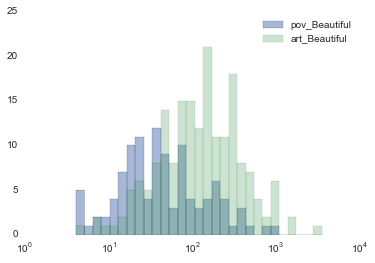

In [49]:
fig = plt.figure()
ax1 = plt.gca()
counthistpair('Beautiful',ax1)

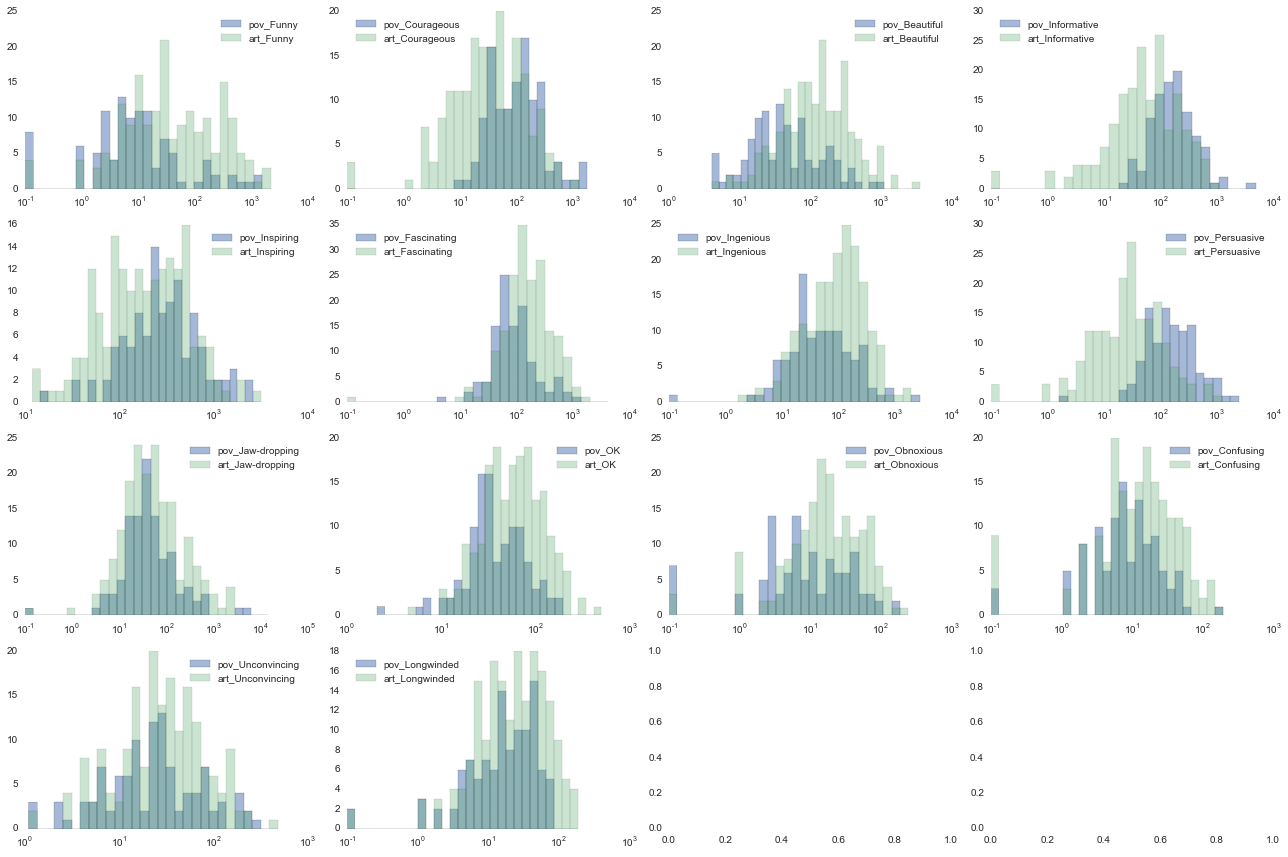

In [50]:
fig, axes=plt.subplots(figsize = (18,12),nrows=4, ncols=4)
for ind in xrange(14):
    i = ind/4;j = ind%4
    ax = axes[i][j]
    counthistpair(ratingwords[ind],ax)
fig.tight_layout()

What we've learned from the above plot?

1. rarely would people think talks related to poverty can be funny, but arts can be
2. A lot of talks on poverty are voted 'courageous'
3. arts talk are more likely to be voted as 'beautiful'
4. Poverty talks are more likely to be considered as 'persuasive'

The above conclusions have two problems with the scales
1. Vertical scale pertains to the total number of talks fall in this category, 108 vs 186, consider a density plot (both normalized to 1); and when the sample size is lower than 50, statistically questionable
2. Horizontal scale pertains to the time since the talks were first published online, should be normalized to compare, e.g., average monthly votes

### Continue - 0512 

#### look into how long each talk has been online 

In [51]:
from datetime import datetime
from datetime import timedelta

In [52]:
talks_small.columns

Index([               u'index',            u'Beautiful',
                  u'Confusing',           u'Courageous',
                u'Fascinating',                u'Funny',
                u'Informative',            u'Ingenious',
                  u'Inspiring',         u'Jaw-dropping',
                 u'Longwinded',                   u'OK',
                  u'Obnoxious',           u'Persuasive',
               u'Unconvincing',      u'commented_count',
                u'description',        u'emailed_count',
                   u'event_id',                   u'id',
                   u'keywords',            u'languages',
                       u'name', u'native_language_code',
               u'published_at',         u'rating_count',
                u'recorded_at',          u'released_at',
                u'speaker_ids',               u'themes',
                 u'updated_at',         u'viewed_count'],
      dtype='object')

In [53]:
stop_time = datetime(2015,5,9)

In [54]:
talks_small['duration']=talks_small['published_at'].apply(lambda x: (stop_time -x).days)

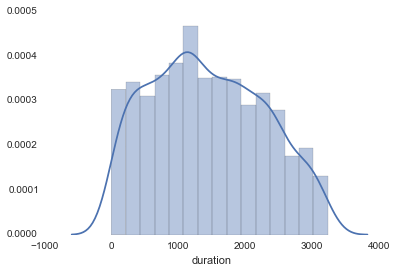

In [55]:
sns.distplot(talks_small.duration)

Now take a look at pov and art talks online times

In [56]:
pov = talks_small[pov_mask];art = talks_small[art_mask]

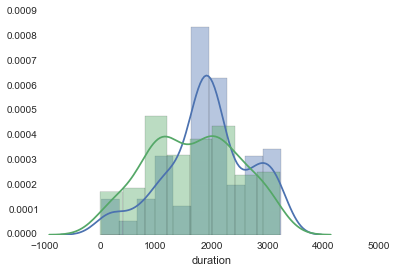

In [57]:
sns.distplot(pov.duration);
sns.distplot(art.duration)

### Time plot: Count vs time 

In [214]:
countvstime = talks_small[['published_at','rating_count','viewed_count','emailed_count','commented_count','id']]

In [215]:
countvstime = countvstime.sort_index(by = 'published_at')

In [216]:
countvstime['date']=countvstime['published_at'].apply(lambda x: x.date())

In [217]:
countvstime.set_index('published_at',inplace = True,)

In [218]:
countvstime.shape

(1976, 6)

In [219]:
countvstime.head(10)

,rating_count,viewed_count,emailed_count,commented_count,id,date
published_at,,,,,,
2006-06-27 00:11:00,2485,2842062,720,244,1,2006-06-27
2006-06-27 00:11:00,3244,1159529,1735,191,53,2006-06-27
2006-06-27 00:11:00,76107,32977311,64907,3992,66,2006-06-27
2006-06-27 00:11:00,2583,1453246,947,117,7,2006-06-27
2006-06-27 20:38:00,11726,14451509,5957,578,96,2006-06-27
2006-06-27 20:38:00,23157,9644044,9897,530,92,2006-06-27
2006-07-10 00:11:00,911,697591,576,44,49,2006-07-10
2006-07-10 00:11:00,5366,3173952,1670,825,86,2006-07-10
2006-07-18 00:11:00,7119,2260546,3353,869,71,2006-07-18


In [210]:
# def a function to plot counts
def countshist(count,freq = 'M',log = True):
    count_resampled = countvstime[count].resample(freq,how = np.median).dropna()
    fig = plt.figure(figsize = (10,7))
    ax = plt.gca()
    countvstime[count].plot(linestyle = 'None',marker = 'o', mec = 'none', alpha = 0.3)
    plt.plot(count_resampled.index,count_resampled.values,'-',color = 'r',label = 'Averaged '+freq+' median')
    if log:
        ax.set_yscale('log')
    plt.xlabel('publish time');plt.ylabel('log of '+count)
    plt.legend(loc = 'best',fontsize = 'medium')

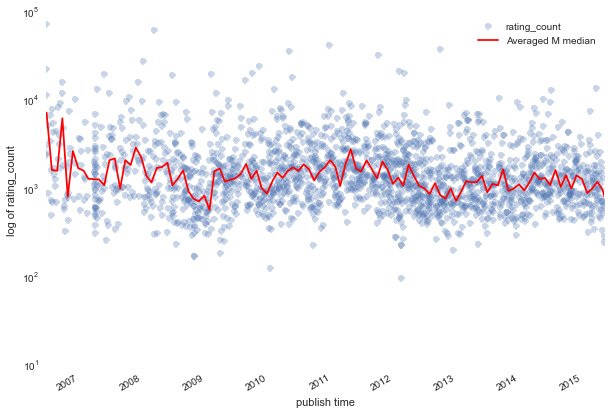

In [211]:
countshist('rating_count')

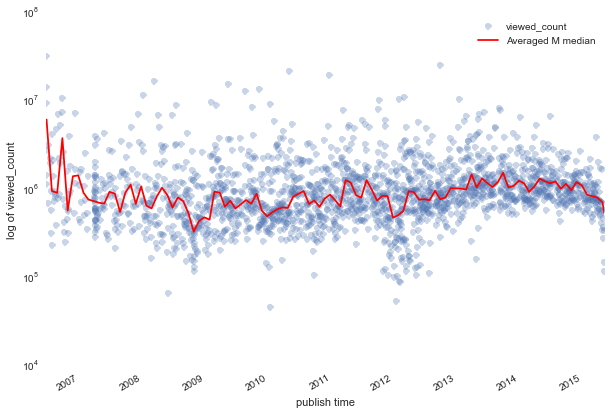

In [212]:
countshist('viewed_count')

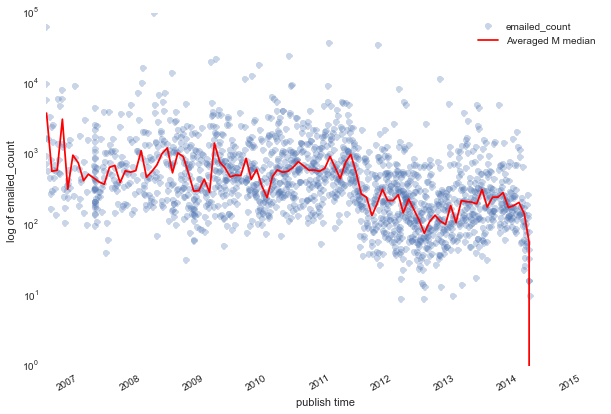

In [213]:
countshist('emailed_count')

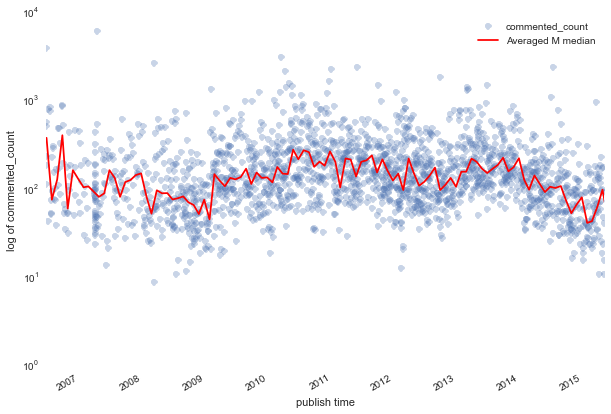

In [220]:
countshist('commented_count')

Summary of time trajectory of counts:
    1. except for the emailed counts, the rest (comments, views, ratings) do not show a drop at the end
    2. many factors can contribute to the flat profile
        (1) most comments, views, ratings are generated within the first a few months/weeks since publication
        (2) more users/viewers in recent years compensate for shorter on-line period
    3. 